# Simulación de procesos estocásticos ARMA, cómputo ACF y PACF

# Simulación IID y 

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


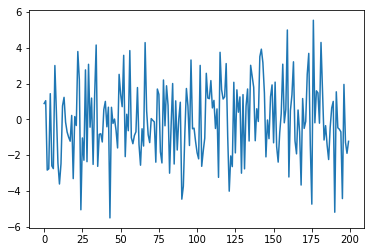

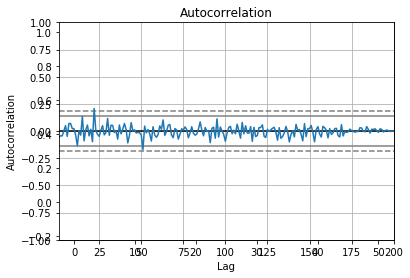

In [9]:

import numpy as np
import pandas as pd
import math 
import matplotlib.pylab as plt
from statsmodels.tsa.arima_process import arma_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.arima_model import ARIMA
n=200 #Tamaño de la serie
l=50 #condiciones iniciales
theta=0.5 
phi=0.5
sigma=2

####Simulación IID####
serieIID=pd.Series(np.random.normal(0, 2, 200))
plt.plot(serieIID)
acf(serieIID,nlags=50,unbiased=False)
plot_acf(serieIID,lags=50,unbiased=False)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(serieIID)
#plt.show()


# Simulación MA(1)

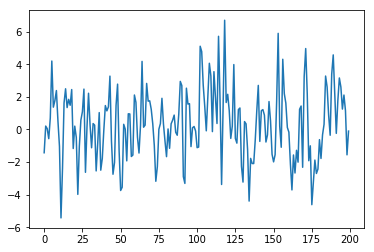

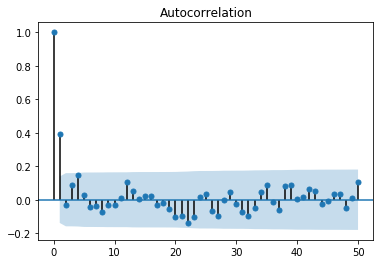

In [10]:
#####Simulación MA(1)#####
ruido=np.random.normal(0, sigma, n+l)
MA1aux=np.zeros(n+l)
for t in range(1,n+l):
    MA1aux[t]=theta*ruido[t-1]+ruido[t]


MA1=pd.Series(MA1aux[(l-1):(n+l-1)])
plt.plot(MA1)

acf(MA1,nlags=50,unbiased=False)

x=plot_acf(MA1,lags=50,unbiased=False, alpha=0.05)

#    # Definición de una nueva función

In [11]:
from pandas.compat import lmap

def autocorrelation_plot_forked(series, ax=None, n_lags=None, change_deno=False, change_core=False, **kwds):
    """
    Autocorrelation plot for time series.
    Parameters:
    -----------
    series: Time series
    ax: Matplotlib axis object, optional
    n_lags: maximum number of lags to show. Default is len(series)
    kwds : keywords
        Options to pass to matplotlib plotting method
    Returns:
    -----------
    class:`matplotlib.axis.Axes`
    """
    import matplotlib.pyplot as plt
    
    n_full = len(series)
    if n_full <= 2:
      raise ValueError("""len(series) = %i but should be > 2
      to maintain at least 2 points of intersection when autocorrelating
      with lags"""%n_full)
      
    # Calculate the maximum number of lags permissible
    # Subtract 2 to keep at least 2 points of intersection,
    # otherwise pandas.Series.autocorr will throw a warning about insufficient
    # degrees of freedom
    n_maxlags = n_full - 2
    
    
    # calculate the actual number of lags
    if n_lags is None:
      # Choosing a reasonable number of lags varies between datasets,
      # but if the data longer than 200 points, limit this to 100 lags as a
      # reasonable default for plotting when n_lags is not specified
      n_lags = min(n_maxlags, 100)
    else:
      if n_lags > n_maxlags:
        raise ValueError("n_lags should be < %i (i.e. len(series)-2)"%n_maxlags)
    
    if ax is None:
        ax = plt.gca(xlim=(1, n_lags), ylim=(-1.0, 1.0))

    if not change_core:
      data = np.asarray(series)
      mean = np.mean(data)
      c0 = np.sum((data - mean) ** 2) / float(n_full)
      def r(h):
          deno = n_full if not change_deno else (n_full - h)
          return ((data[:n_full - h] - mean) *
                  (data[h:] - mean)).sum() / float(deno) / c0
    else:
      def r(h):
        return series.autocorr(lag=h)
      
    x = np.arange(n_lags) + 1
    y = lmap(r, x)
    z95 = 1.959963984540054
    z99 = 2.5758293035489004
    ax.axhline(y=z99 / np.sqrt(n_full), linestyle='--', color='grey')
    ax.axhline(y=z95 / np.sqrt(n_full), color='grey')
    ax.axhline(y=0.0, color='black')
    ax.axhline(y=-z95 / np.sqrt(n_full), color='grey')
    ax.axhline(y=-z99 / np.sqrt(n_full), linestyle='--', color='grey')
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.plot(x, y, **kwds)
    if 'label' in kwds:
        ax.legend()
    ax.grid()
    
    return ax

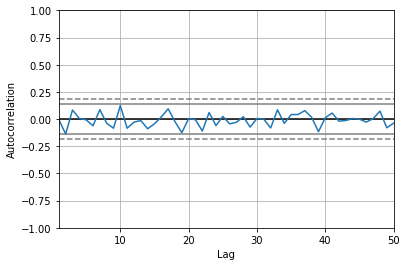

In [8]:
autocorrelation_plot_forked(serieIID, n_lags=50)

# Simulación ARMA

array([ 1.        ,  0.49234155,  0.26546148,  0.24868844,  0.05428877,
        0.11790088,  0.03088673, -0.1140841 , -0.06344877, -0.07470163,
       -0.03284976, -0.02175605, -0.0094192 , -0.00945496,  0.02567791,
       -0.06862677, -0.10632925, -0.06589296, -0.0804648 , -0.02374443,
        0.025295  , -0.01043217, -0.12161189, -0.16327466, -0.11374323,
       -0.16290367, -0.12491133, -0.05695864, -0.12043798, -0.09444367,
       -0.04082355, -0.04088603, -0.10110115, -0.13639095, -0.10785793,
       -0.04020291, -0.01642865,  0.06281423,  0.06890765,  0.05498375,
        0.12718555,  0.13713571,  0.05010229,  0.02125286, -0.02041669,
       -0.0401539 , -0.01328464,  0.03247933,  0.06530489,  0.09353878,
        0.1117868 ])

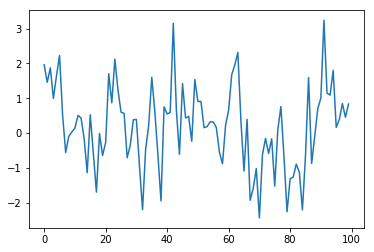

In [14]:
ar=np.array([1,-0.5]) ####Se debe cambiar de signo los coeficientes de la parte autoregresiva.
ma=np.array([1])

np.random.seed(186)
Tlength=100
sigma=1
simul = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,sigma=1,distrvs=np.random.randn) 
plt.plot(simul)
acf(simul,nlags=50,unbiased=False)
#plot_acf(simul,lags=50,unbiased=False)




# ACF Teórico

In [19]:
teor = arma_acf(ar,ma,20)
print(teor)
#### Con función ArmaProcess
ARMA=ArmaProcess(ar,ma)
ARMA.acf(5)

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06]


array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

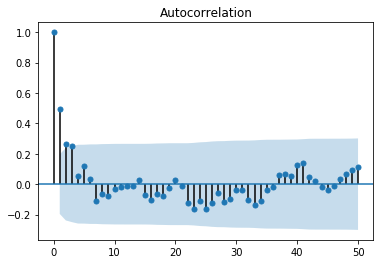

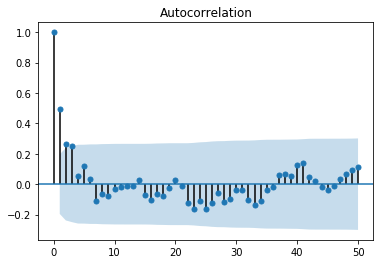

In [20]:
acf(simul,nlags=50,unbiased=False)
plot_acf(simul,lags=50,unbiased=False)




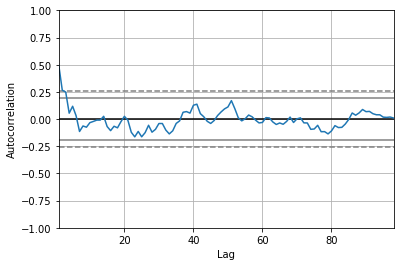

In [21]:
autocorrelation_plot_forked(simul)
plt.show()